In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
from functions import *

In [2]:
class SelectAreaDetect:
    def __init__(self, image_path="demo/demo.png", scale=0.5):
        self.image_path = image_path
        self.scale = scale
        self.points = []
    def plot_point(self, image):
        if len(self.points) == 1:
            x, y = self.points[0]
            cv2.circle(image, (x, y), 3, (0, 0, 255), -3)
        else:
            for i in range(len(self.points)-1):
                x1, y1 = self.points[i]
                x2, y2 = self.points[i+1]
                cv2.circle(image, (x1, y1), 3, (0, 0, 255), -3)
                cv2.circle(image, (x2, y2), 3, (0, 0, 255), -3)
                cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.imshow("Image", image)

    def __call__(self, output_path="demo/demo.txt"):
        def click_event(event, x, y, flags, params):
            if event == cv2.EVENT_LBUTTONDOWN:
                print(f'Point coordinates: ({x}, {y})')
                self.points.append((x, y))        
                self.plot_point(img)
        img = cv2.imread(self.image_path)
        h, w = img.shape[:2]
        img = cv2.resize(img, (int(w*self.scale), int(h*self.scale)))
        cv2.imshow('Image', img)

        cv2.setMouseCallback('Image', click_event)
        while True:
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
        cv2.destroyAllWindows()

        with open(output_path, "w") as f:
            for x, y in self.points:
                x, y = x/self.scale, y/self.scale
                f.write(f"{int(x)} {int(y)}\n")

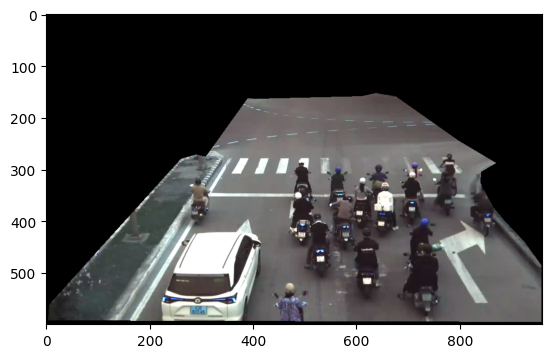

In [3]:
point_path = "demo/demo.txt"
img_path = "demo/demo.png"
scale = 0.5
mask = gen_mask(point_path, img_path, scale)
import matplotlib.pyplot as plt
img = cv2.imread("demo/demo.png")
img, result = process_image(img, mask, scale)
plt.imshow(result)
plt.show()

In [4]:
demo_path = "/home/namtt/WorkSpace/MyProjects/TraficDetections/data/demo.mp4"
scale=0.5
mask = gen_mask("demo/demo.txt", "demo/demo.png", scale)
model = YOLO("weights/best.pt")
model.eval()
cap = cv2.VideoCapture(demo_path)
fps = cap.get(cv2.CAP_PROP_FPS)
skip = 0.2
frame_skip = max(1, int(fps*skip))
frame_count = 0

In [ ]:
# demo_path = "/home/namtt/WorkSpace/MyProjects/TraficDetections/data/demo.mp4"
demo_path1 = "/home/namtt/Downloads/Cauvuot ToHuu/IMG_4524.MOV"
demo_path2 = "/home/namtt/Downloads/Cauvuot ToHuu/IMG_4526.MOV"
scale=0.5
mask = gen_mask("demo/demo.txt", "demo/demo.png", scale)
model = YOLO("weights/best.pt")
model.eval()
cap = cv2.VideoCapture(demo_path1)
fps = cap.get(cv2.CAP_PROP_FPS)
skip = 0.2
frame_skip = max(1, int(fps*skip))
frame_count = 0
class_names = ["car", "motor", "bus", "truck"]
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 0),
    (0, 255, 255) 
]
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1
    if frame_count % frame_skip != 0:
        continue
    # frame, frame_prc = process_image(frame, mask, scale)
    frame = cv2.resize(frame, (1600, 800))
    result = model.track(frame, conf=0.75, iou=0.7, persist=True, device="cpu", verbose=False)[0]
    for bbox in result.boxes:
        if bbox.id is not None:
            x1, y1, x2, y2 = bbox.xyxy[0].cpu().numpy().astype(int)
            id_ = bbox.id[0].cpu().numpy().astype(int)
            cls = bbox.cls[0].cpu().numpy().astype(int)
            # id_name = class_names[cls]
            color = colors[cls]
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f"ID:{id_}", (x1, y1+3), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
    cv2.imshow("Image", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()